<a href="https://colab.research.google.com/github/nadgc-CGDAN/MachineLearnin_BreastCancer/blob/main/Yolov4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/AlexeyAB/darknet


Cloning into 'darknet'...
remote: Enumerating objects: 15851, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15851 (delta 5), reused 11 (delta 4), pack-reused 15833 (from 1)
Receiving objects: 100% (15851/15851), 14.42 MiB | 15.46 MiB/s, done.
Resolving deltas: 100% (10671/10671), done.


In [ ]:
cd darknet

/content/darknet


In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘bu

In [ ]:
ls

3rdparty/       darknet*                Dockerfile.cpu          Makefile        scripts/
backup/         DarknetConfig.cmake.in  Dockerfile.gpu          net_cam_v3.sh*  src/
build/          darknet_images.py       image_yolov3.sh*        net_cam_v4.sh*  vcpkg.json
build.ps1*      darknet.py              image_yolov4.sh*        obj/            vcpkg.json.opencv23
cfg/            darknet_video.py        include/                package.xml     video_yolov3.sh*
cmake/          data/                   json_mjpeg_streams.sh*  README.md       video_yolov4.sh*
CMakeLists.txt  docker-compose.yml      LICENSE                 results/


In [ ]:
import os

image_folder = r'C:\Users\cd\Documents\mama'
images = [f for f in os.listdir(image_folder) if f.endswith('.png')]

with open('train.txt', 'w') as f:
    for image in images:
        f.write(os.path.join(image_folder, image) + '\n')

print("train.txt criado com sucesso!")


In [ ]:
from google.colab import files

uploaded = files.upload()

# Verificar os arquivos enviados
for filename in uploaded.keys():
    print(f'Arquivo {filename} carregado com sucesso.')


Saving image1.png to image1.png
Saving image2.png to image2.png
Saving image3.png to image3.png
Arquivo image1.png carregado com sucesso.
Arquivo image2.png carregado com sucesso.
Arquivo image3.png carregado com sucesso.


In [ ]:
import shutil

# Defina o diretório de destino
destination_folder = '/content/mama'

# Crie o diretório se não existir
os.makedirs(destination_folder, exist_ok=True)

# Mova os arquivos carregados para o diretório de destino
for filename in uploaded.keys():
    shutil.move(filename, os.path.join(destination_folder, filename))

print(f'Todos os arquivos foram movidos para {destination_folder}.')


Todos os arquivos foram movidos para /content/mama.


In [ ]:
import os

image_folder = r'C:\Users\cd\Documents\mama'
images = [f for f in os.listdir(image_folder) if f.endswith('.png')]

with open('train.txt', 'w') as f:
    for image in images:
        f.write(os.path.join(image_folder, image) + '\n')

print("train.txt criado com sucesso!")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\cd\\Documents\\mama'

In [ ]:
!ls /content/mama


image1.png  image2.png	image3.png


In [ ]:
import os

# Diretório onde as imagens estão localizadas
image_folder = '/content/mama'
images = ['image1.png', 'image2.png', 'image3.png']

# Criação do arquivo train.txt
with open('train.txt', 'w') as f:
    for image in images:
        f.write(os.path.join(image_folder, image) + '\n')

print("train.txt criado com sucesso!")


train.txt criado com sucesso!


In [ ]:
import pandas as pd

# Criando o DataFrame com os caminhos das imagens
data = {'image_path': [os.path.join(image_folder, img) for img in images]}
df = pd.DataFrame(data)

# Salvando o DataFrame como train.csv
df.to_csv('train.csv', index=False)

print("train.csv criado com sucesso!")


train.csv criado com sucesso!


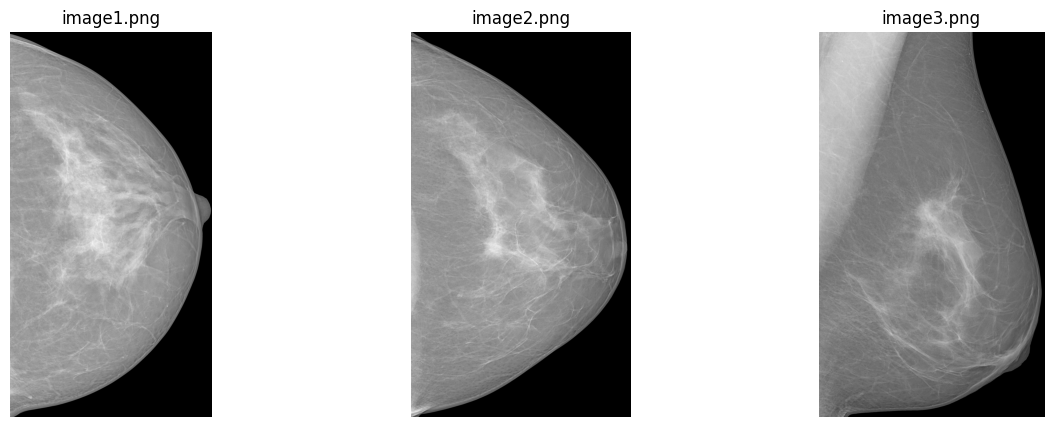

In [ ]:
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for i, image in enumerate(images):
    img = cv2.imread(os.path.join(image_folder, image))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, len(images), i+1)
    plt.imshow(img_rgb)
    plt.title(image)
    plt.axis('off')

plt.show()
